## Introduction 

The aim of today's lab is to find out how the next labs will be held and recap ML workflow.

You're asked to predict final grades of students by their attendance, midterm and assignments scores. The data are real anonymized grades from one of some course, but also contain some fictional 'students'.  

Evaluation metric for this competition is R^2.

## Task

- Obtain data from competition 
- Create a Jupyter notebook which will produce a file for submission
- Submit it to the competition

### Data

Data contains `train` and `test` splits. Your goal is to train any appropriate ML model on `train` split and run inference on `test` split.

In [115]:
import pandas as pd
import numpy as np
import sklearn
import warnings 
warnings.filterwarnings('ignore')

In [116]:
train_data = pd.read_csv('/kaggle/input/pmldl-week-1-test-regression-competition/train.csv',sep=';')
train_data.replace('-', np.nan, inplace=True)
train_data= train_data.astype('float64')
train_data.head(20)

,Course Grade (Real),Assignment: In-class participation,Assignment: Assignment 1,Assignment: Midterm
0,100.0,5.00,100.0,26.0
1,73.0,1.25,98.0,12.0
2,78.0,NaN,96.0,14.0
3,100.0,0.00,100.0,20.0
4,70.0,0.00,84.0,26.0
5,72.0,5.00,85.0,12.0
6,28.0,0.00,20.0,22.0
7,65.0,NaN,93.0,8.0
8,77.0,0.63,100.0,20.0
9,91.0,0.33,94.0,28.0


In [117]:
train_data = train_data.dropna(subset=["Assignment: Assignment 1"]) 

In [118]:
train_data['Assignment: In-class participation']

0      5.00
1      1.25
2       NaN
3      0.00
4      0.00
       ... 
239    3.00
240    0.00
241    0.42
242    3.00
243    5.00
Name: Assignment: In-class participation, Length: 242, dtype: float64

In [119]:
len(train_data.columns)

4

In [120]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 0 to 243
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Course Grade (Real)                 242 non-null    float64
 1   Assignment: In-class participation  201 non-null    float64
 2   Assignment: Assignment 1            242 non-null    float64
 3   Assignment: Midterm                 242 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB


In [121]:
train_data.describe(include = 'all')

,Course Grade (Real),Assignment: In-class participation,Assignment: Assignment 1,Assignment: Midterm
count,242.000000,201.000000,242.000000,242.000000
mean,70.599174,1.951990,84.992107,18.495868
std,25.352954,1.836554,25.878099,7.057116
min,0.000000,0.000000,0.000000,0.000000
25%,59.000000,0.000000,83.625000,16.000000
50%,76.000000,1.250000,96.500000,20.000000
75%,88.750000,3.750000,100.000000,24.000000
max,100.000000,5.000000,100.000000,30.000000


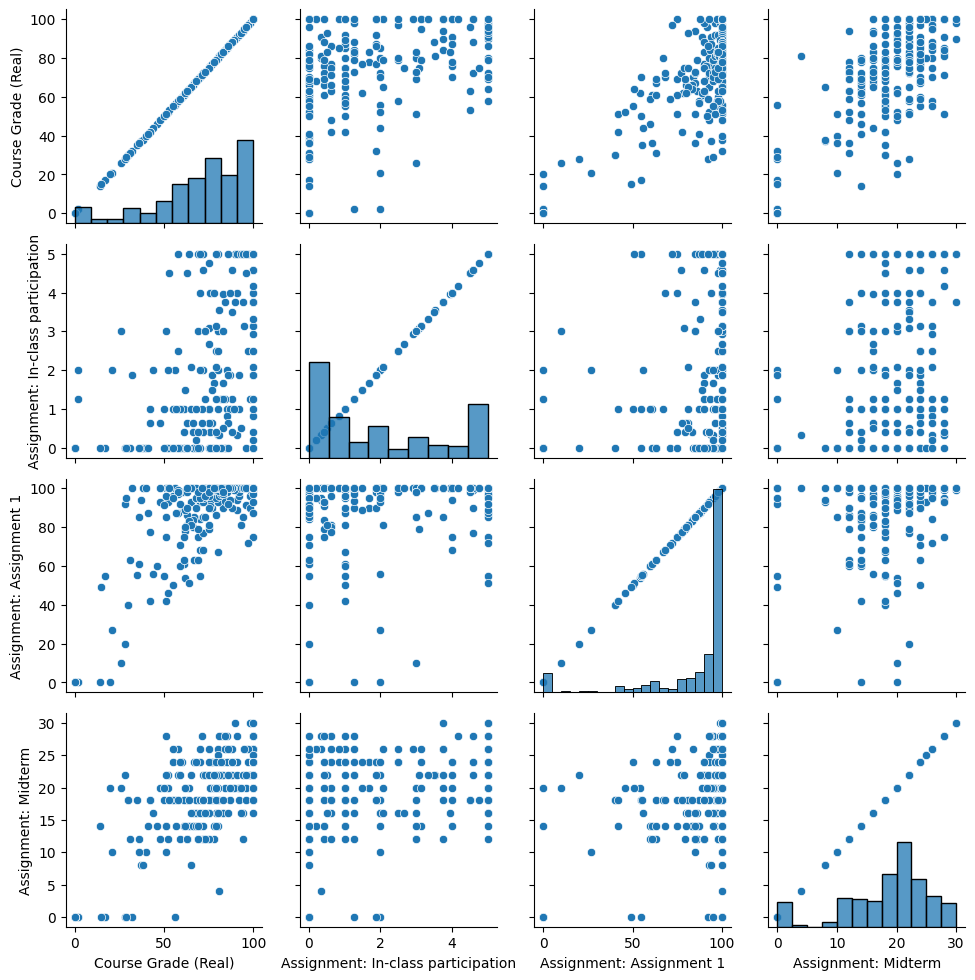

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.PairGrid(data = train_data, vars=["Course Grade (Real)", "Assignment: In-class participation", 'Assignment: Assignment 1', 'Assignment: Midterm'])
g.map_diag(sns.histplot)
g.map(sns.scatterplot)
plt.show()

## Preprocessing

Please note that all the features have their own scales. Also some of them have missing values. Thus, you should apply Scaler and Imputer on the features and Scaler on labels.

In [123]:
train_data['Course Grade (Real)'].info()

<class 'pandas.core.series.Series'>
Index: 242 entries, 0 to 243
Series name: Course Grade (Real)
Non-Null Count  Dtype  
--------------  -----  
242 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [124]:

# imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
# X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# # the model learns that the second feature is double the first
# print(np.round(imp.transform(X_test)))

In [125]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
# from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
# from sklearn.impute import IterativeImputer
# imp = IterativeImputer(max_iter=10, random_state=0)

y = train_data['Course Grade (Real)']
y = np.array(y).reshape(-1, 1)
# Write your code here
label_scaler = MinMaxScaler()
# imp = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

y = label_scaler.fit_transform(y)
# y = imp.fit_transform(y)
X = train_data.drop('Course Grade (Real)', axis=1)
# Write your code here - do some preprocessing

imp = SimpleImputer(missing_values= np.nan, strategy='constant', fill_value = 0.66)
X = imp.fit_transform(X)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.05, random_state=42)

In [126]:
X[:,2].min()

0.0

### Model
Implement any appropriate regression  ML model you like. Consider the number of features and data points when chose a model.

In [127]:
# from sklearn.linear_model import LinearRegression

# from sklearn.linear_model import RidgeCV
# from sklearn.svm import LinearSVR
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import StackingRegressor
# estimators = [
#     ('Rc', RidgeCV()),
# #     ('lr',LinearRegression()),
#     ('svr', LinearSVR(random_state=42))
# ]
# reg = StackingRegressor(
#     estimators=estimators,
#     final_estimator=RandomForestRegressor(n_estimators=20,
#                                           random_state=42)
# )

# reg.fit(X, y).score(X, y)

In [128]:
from scipy.stats import uniform
distributions = dict(n_estimators=[i for i in range(25,220)])

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures 
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
poly_features = PolynomialFeatures(degree=2) # decide the maximal degree of the polynomial feature
X_ploy = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_ploy, y)
print(model.score(X_ploy, y))
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
my_model = XGBRegressor(n_estimators=200, learning_rate=0.1)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=10, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)
from sklearn.metrics import r2_score
est = GradientBoostingRegressor(learning_rate = 0.1)#.fit(X_train,y_train)
srch = RandomizedSearchCV(est, distributions, random_state=0)
srch.fit(X_train,y_train)
print(srch.best_params_)
# print(est.score(X_train,y_train))
# predictions = est.predict(X_valid)
# print("r2_score: " + str(r2_score(predictions, y_valid)))

0.7957515805530248
{'n_estimators': 43}


In [138]:
est = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 43, verbose = 1).fit(X_train,y_train)
# model = LGBMRegressor(max_depth = 4, num_leaves = 15, n_estimators = 70, reg_alpha = 0.03)
est.fit(X,y)
print(est.score(X_train,y_train))
predictions = est.predict(X_valid)
print("r2_score: " + str(r2_score(predictions, y_valid)))

      Iter       Train Loss   Remaining Time 
         1           0.0541            0.07s
         2           0.0469            0.05s
         3           0.0408            0.04s
         4           0.0357            0.04s
         5           0.0315            0.04s
         6           0.0281            0.03s
         7           0.0253            0.03s
         8           0.0229            0.03s
         9           0.0209            0.03s
        10           0.0193            0.03s
        20           0.0118            0.02s
        30           0.0098            0.01s
        40           0.0089            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0551            0.03s
         2           0.0475            0.03s
         3           0.0413            0.03s
         4           0.0361            0.03s
         5           0.0319            0.03s
         6           0.0284            0.03s
         7           0.0256            0.03s
        

### Inference
Run you trained model on `test` split


In [139]:
test_data = pd.read_csv('/kaggle/input/pmldl-week-1-test-regression-competition/test.csv', sep=';')
test_data.replace('-', np.nan, inplace=True)
test_data.head()


,Assignment: In-class participation,Assignment: Assignment 1,Assignment: Midterm
0,3,100.0,14
1,NaN,100.0,18
2,1,100.0,16
3,1,100.0,16
4,NaN,61.0,20


In [140]:
from sklearn.preprocessing import StandardScaler



X_test = test_data
# Write your code here - do some preprocessing
# from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values= np.nan, strategy='constant', fill_value = 0.66)
X_test = imp.fit_transform(X_test)
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)
X_test

array([[0.6       , 1.        , 0.5       ],
       [0.132     , 1.        , 0.64285714],
       [0.2       , 1.        , 0.57142857],
       [0.2       , 1.        , 0.57142857],
       [0.132     , 0.61      , 0.71428571],
       [0.        , 0.7       , 0.64285714],
       [0.084     , 1.        , 0.85714286],
       [0.        , 0.92      , 0.78571429],
       [1.        , 1.        , 1.        ],
       [0.132     , 1.        , 0.92857143],
       [0.132     , 0.89      , 0.42857143],
       [0.132     , 0.735     , 0.        ],
       [0.4       , 0.94      , 0.78571429],
       [0.1       , 0.91      , 0.5       ],
       [0.        , 0.        , 0.        ],
       [0.132     , 0.99      , 0.78571429],
       [0.132     , 0.85      , 0.78571429],
       [0.9       , 1.        , 0.92857143],
       [1.        , 1.        , 0.85714286],
       [0.        , 0.86      , 0.64285714],
       [0.132     , 0.63      , 0.78571429],
       [0.9       , 0.74      , 0.42857143],
       [0.

In [141]:
# # Write your code here - don't forget to apply the same transformation on test data
# preproc_test = ...
# from sklearn.preprocessing import PolynomialFeatures 
# poly_features = PolynomialFeatures(degree=2) # decide the maximal degree of the polynomial feature
# X_ploy_test = poly_features.fit_transform(X_test)
# # predictions = model.predict(X_ploy_test)
# predictions = my_model.predict(X_test)
predictions = est.predict(X_test)

In [142]:
print(len(X_test))

43


In [143]:
predictions.reshape(-1, 1)

array([[0.73271664],
       [0.79821343],
       [0.80404549],
       [0.80404549],
       [0.52601563],
       [0.64338686],
       [0.8664896 ],
       [0.70124852],
       [0.97546635],
       [0.83193307],
       [0.63590173],
       [0.4012997 ],
       [0.8072623 ],
       [0.68276749],
       [0.01294854],
       [0.81912932],
       [0.70916084],
       [0.94234504],
       [0.97546635],
       [0.68046467],
       [0.62651137],
       [0.74459089],
       [0.77657798],
       [0.70574331],
       [0.88864686],
       [0.4318924 ],
       [0.67785098],
       [0.01689615],
       [0.92406412],
       [0.97546635],
       [0.31680724],
       [0.7190598 ],
       [0.75305839],
       [0.1979537 ],
       [0.93701361],
       [0.71699658],
       [0.7908243 ],
       [0.70748766],
       [0.77657798],
       [0.64895578],
       [0.69991836],
       [0.78559787],
       [0.65140998]])

### Save model predictions
Save model predictions to `submission.csv` and submit to competition

In [144]:
preds = pd.DataFrame(label_scaler.inverse_transform(predictions.reshape(-1, 1)).astype(int), columns=['Course Grade (Real)'])
# Insert ID column for Kaggle
preds.insert(0, 'ID', range(0, len(preds)))

preds.head(10)

,ID,Course Grade (Real)
0,0,73
1,1,79
2,2,80
3,3,80
4,4,52
5,5,64
6,6,86
7,7,70
8,8,97
9,9,83


In [145]:
preds.to_csv('submission.csv', index=None)